# Query 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
- Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
- This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("week2.csv")
del data['Unnamed: 0']

In [3]:
data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
489,SONATSOFTW,EQ,07-May-2019,329.85,331.20,345.55,330.00,341.8,340.50,339.72,177235,60210761.20,6202,83876,47.32,5,2019,285.643047,0.032287,Slight or No change
490,SONATSOFTW,EQ,08-May-2019,340.50,347.00,347.00,333.10,335.5,338.10,337.34,69025,23284578.45,4327,33470,48.49,5,2019,285.668250,-0.007048,Slight or No change
491,SONATSOFTW,EQ,09-May-2019,338.10,337.00,337.00,331.65,332.0,332.95,333.60,36413,12147467.00,1737,19095,52.44,5,2019,285.680231,-0.015232,Slight or No change
492,SONATSOFTW,EQ,10-May-2019,332.95,330.05,335.00,330.05,333.0,332.85,332.03,35325,11729018.00,3454,20903,59.17,5,2019,285.691823,-0.000300,Slight or No change
493,SONATSOFTW,EQ,13-May-2019,332.85,334.60,342.00,332.00,337.7,339.80,338.57,99259,33606229.05,4240,55470,55.88,5,2019,285.729162,0.020880,Slight or No change


In [4]:
plt.style.use('fivethirtyeight')

In [5]:
data.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Month                       int64
Year                        int64
VWAP                      float64
Day_Perc_Change           float64
Trend                      object
dtype: object

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.index = data.Date

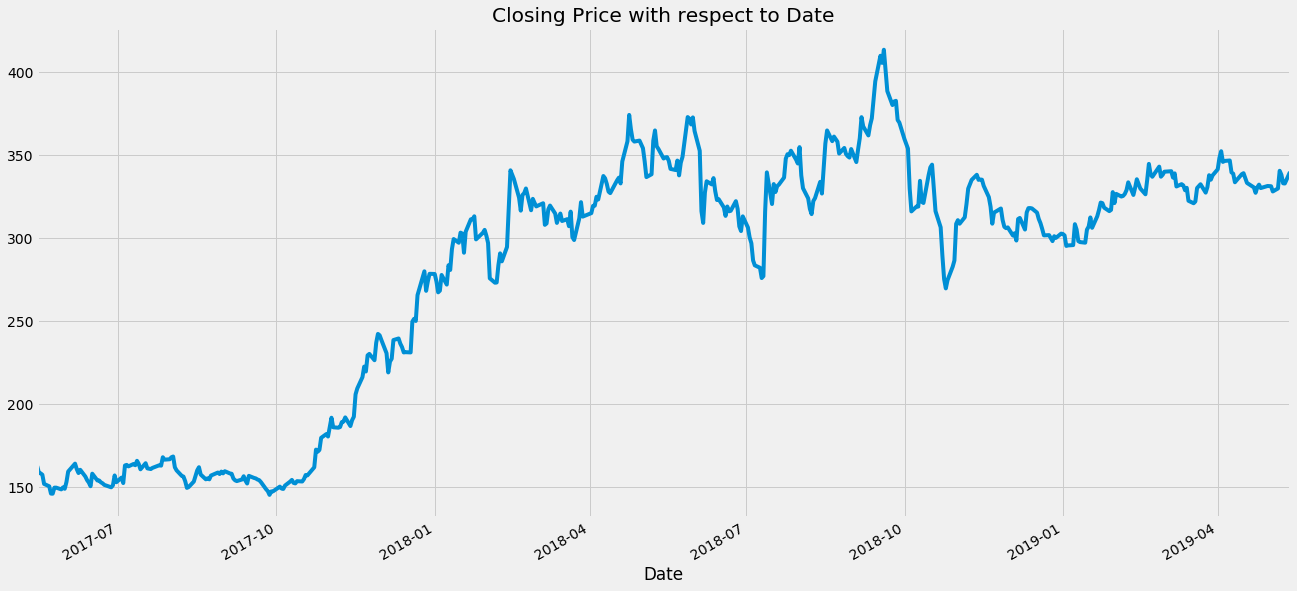

In [7]:
data['Close Price'].plot(label = 'SONATA SOFTWARE',figsize=(20,10),title='Closing Price with respect to Date')

# Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

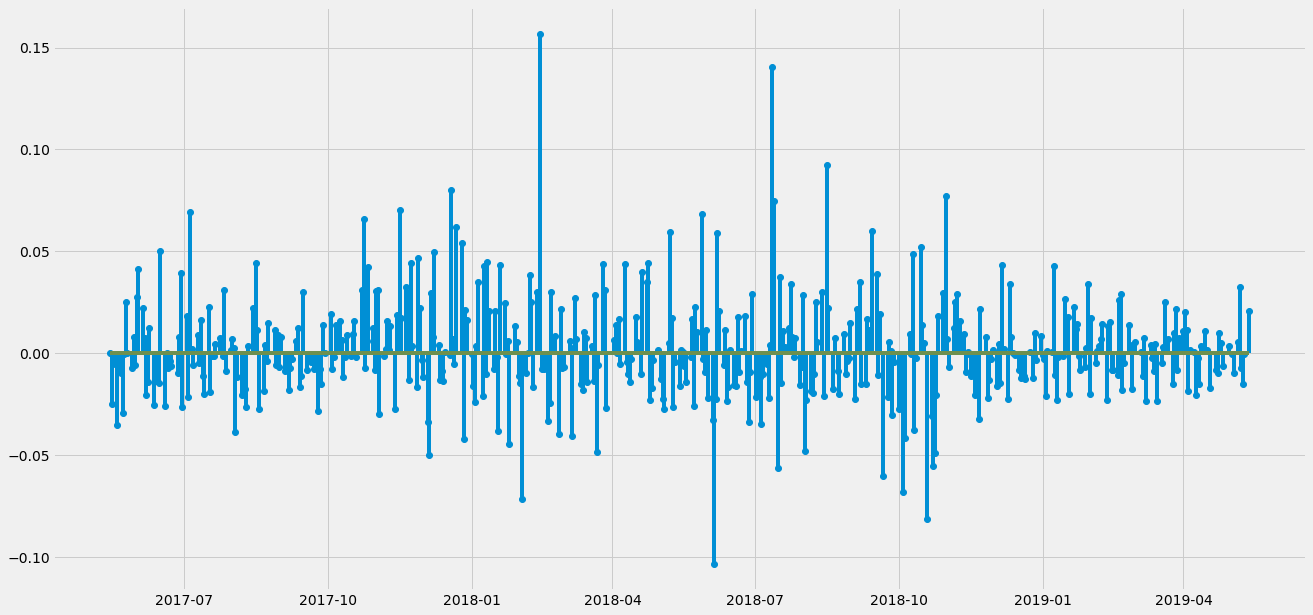

In [8]:
fig = plt.figure(figsize = (20,10))
plt.stem(data.Date, data['Day_Perc_Change'])

# Query 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

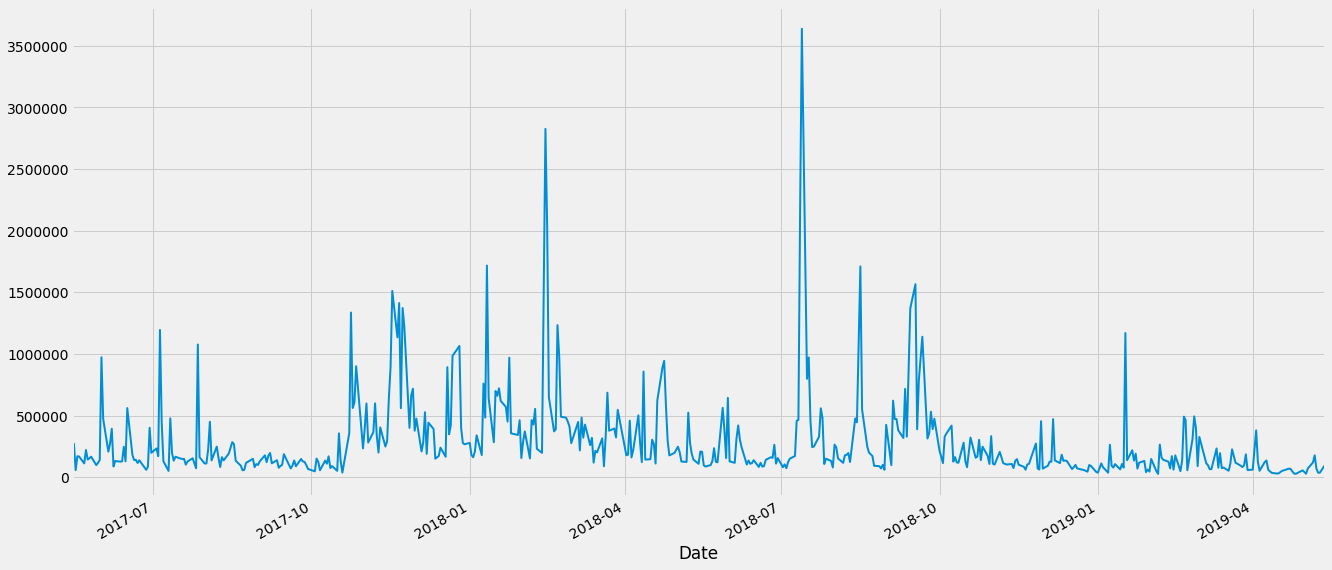

In [9]:
data['Total Traded Quantity'].plot(figsize = (20,10), lw=2)

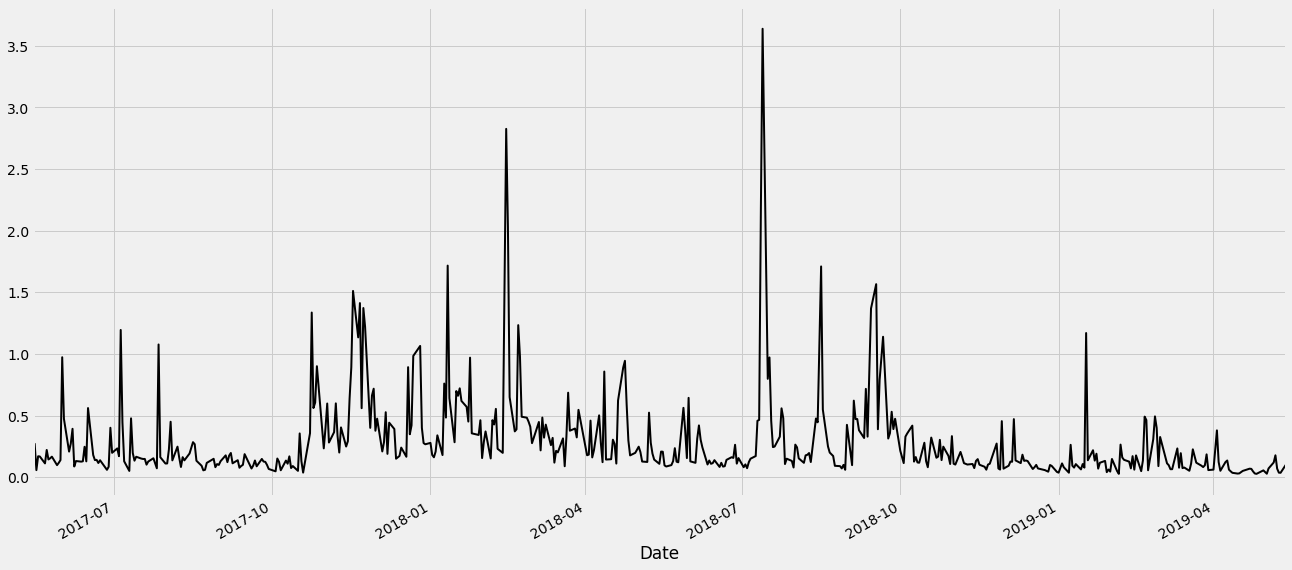

In [10]:
# fig = plt.figure(figsize = (20,10))
# plt.stem(data.Date, data['Day_Perc_Change'])
(data['Total Traded Quantity']/1000000).plot(figsize = (20,10), lw = 2, c = 'k')

# Query 2.4
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000278F1E71160>],
      dtype=object)

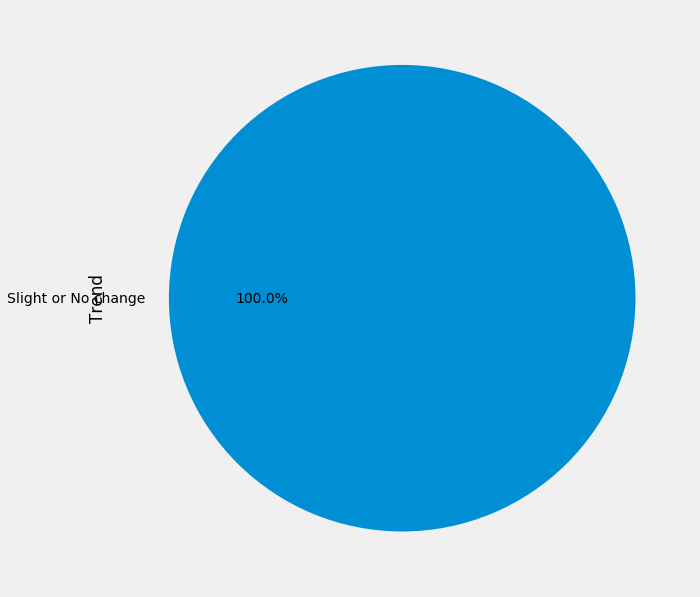

In [11]:
pie_data = data.groupby('Trend').Trend.count()
pie_data.plot.pie(subplots = True, figsize = (20, 10), autopct = '%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000278F1EB5390>,
      dtype=object)

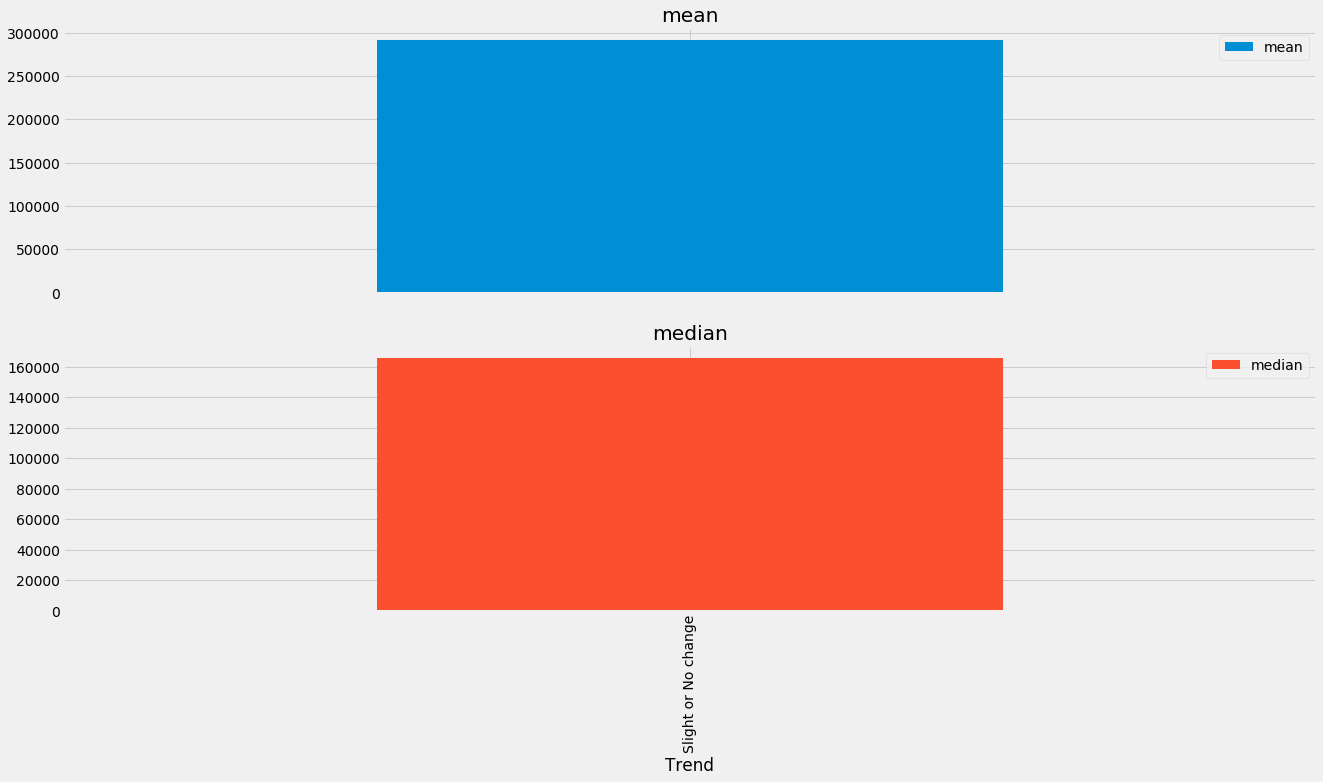

In [12]:
bar_data = data.groupby('Trend')['Total Traded Quantity'].agg(['mean', 'median'])
bar_data.plot.bar(subplots = True, figsize = (20, 10))

# Query 2.5
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

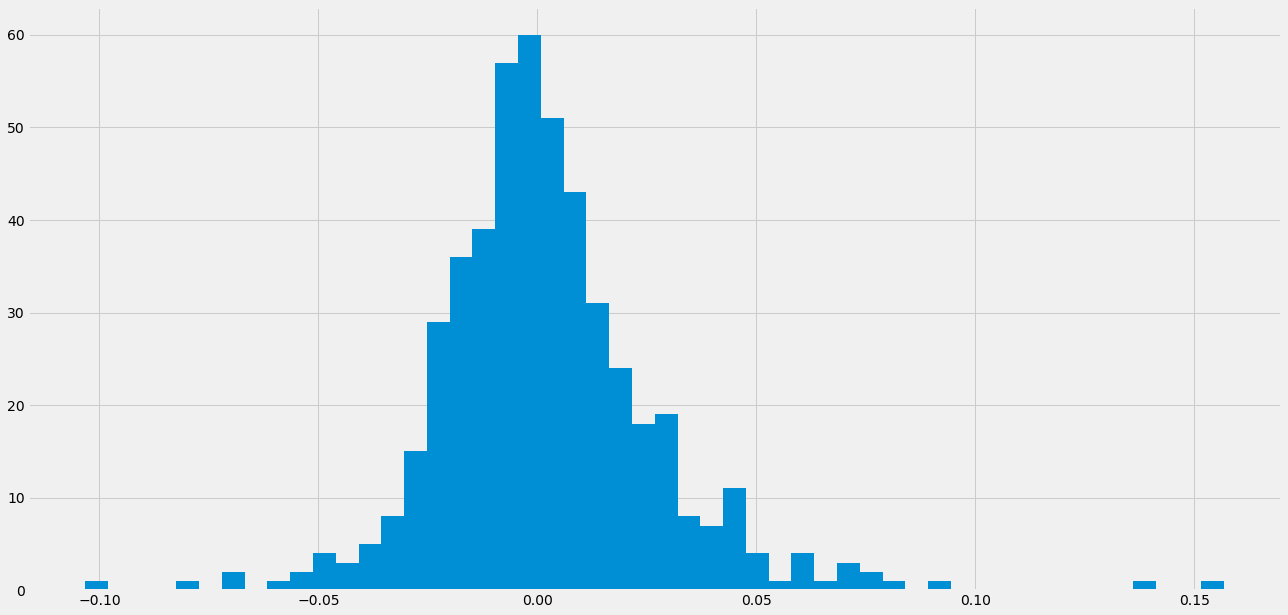

count    494.000000
mean       0.001807
std        0.025294
min       -0.103248
25%       -0.012587
50%       -0.000299
75%        0.013200
max        0.156823
Name: Day_Perc_Change, dtype: float64


In [13]:
data.Day_Perc_Change.hist(bins = 50, figsize = (20,10))
plt.show()
print(data.Day_Perc_Change.describe())

# Query 2.6
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation(https://www.investopedia.com/terms/c/correlation.asp) and diversification(https://www.investopedia.com/terms/d/diversification.asp). 

In [14]:
data1 = pd.read_csv('Stocks\\CIPLA.csv')
data2 = pd.read_csv('Stocks\\SUZLON.csv')
data3 = pd.read_csv('Stocks\\MARUTI.csv')
data4 = pd.read_csv('Stocks\\BAJFINANCE.csv')
data5 = pd.read_csv('Stocks\\JUBLFOOD.csv')
datai = pd.read_csv('Stocks\\Nifty50.csv')

In [15]:
data1 = data1[data1.Series == 'EQ']
data1.reset_index(inplace = True, drop = True)
data2 = data2[data2.Series == 'EQ']
data2.reset_index(inplace = True, drop = True)
data3 = data3[data3.Series == 'EQ']
data3.reset_index(inplace = True, drop = True)
data4 = data4[data4.Series == 'EQ']
data4.reset_index(inplace = True, drop = True)
data5 = data5[data5.Series == 'EQ']
data5.reset_index(inplace = True, drop = True)

In [16]:
data1 = data1[['Close Price']]
data1.columns = ['cipla']
data2 = data2[['Close Price']]
data2.columns = ['suzlon']
data3 = data3[['Close Price']]
data3.columns = ['maruti']
data4 = data4[['Close Price']]
data4.columns = ['bajaj']
data5 = data5[['Close Price']]
data5.columns = ['jubilant']
datai = datai[['Close']]
datai.columns = ['Nifty']

In [17]:
compare = pd.concat([data1, data2, data3, data4, data5, datai], axis = 1)

In [18]:
compare

,cipla,suzlon,maruti,bajaj,jubilant,Nifty
0,569.00,19.60,6823.90,1332.95,1025.45,9445.40
1,565.60,19.70,6953.95,1347.75,1050.65,9512.25
2,562.35,19.90,6958.20,1324.80,1049.05,9525.75
3,560.10,20.00,6831.05,1314.55,1019.35,9429.45
4,564.95,20.60,6790.55,1289.15,1018.10,9427.90
5,563.10,20.40,6701.70,1242.15,1030.30,9438.25
6,533.20,19.75,6878.85,1233.75,993.15,9386.15
7,519.65,18.85,6869.65,1224.35,976.45,9360.55
8,504.00,19.35,6985.70,1258.85,1014.95,9509.75
9,488.90,19.80,7064.80,1317.80,992.70,9595.10


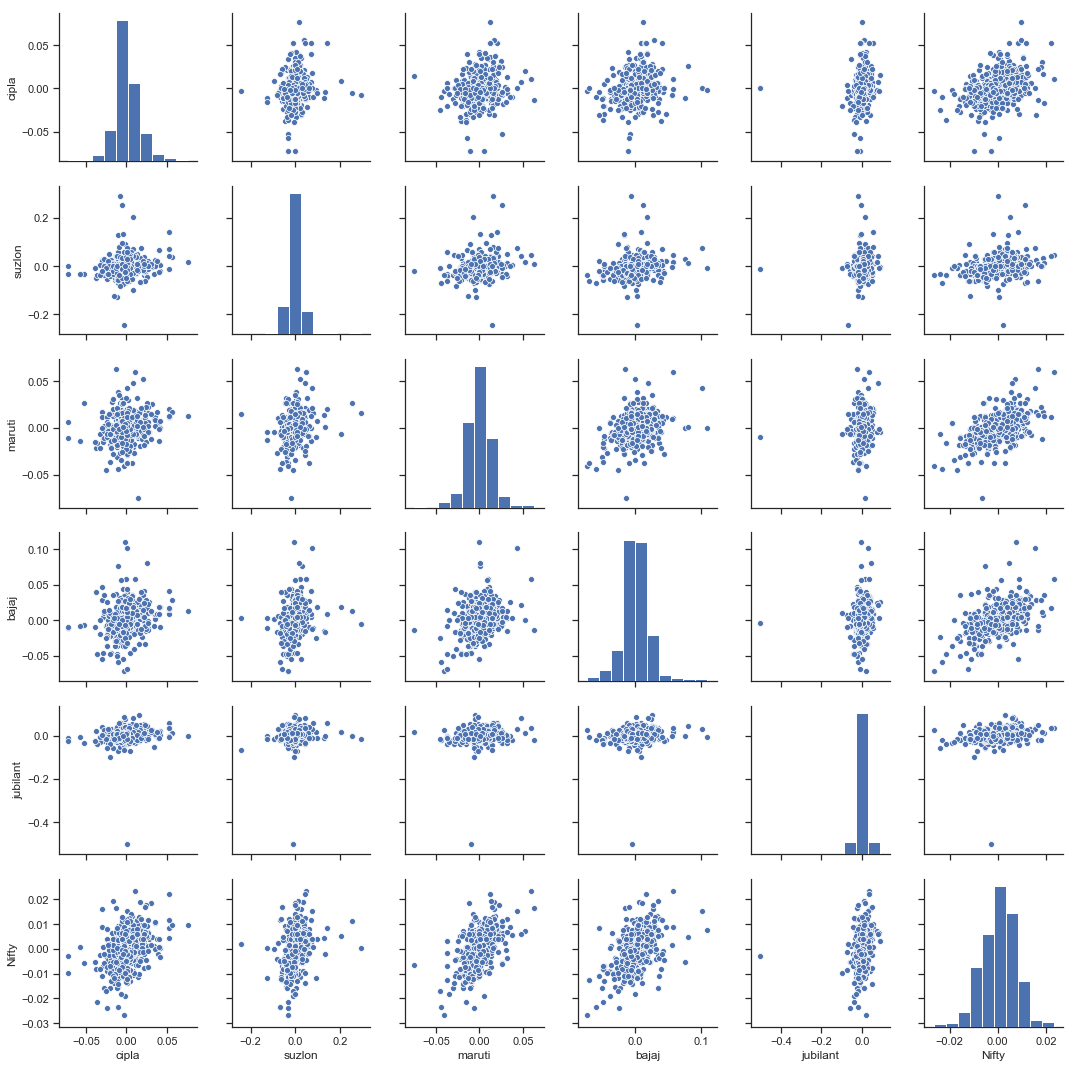

In [19]:
compare = compare.pct_change()
sns.set(style = 'ticks', color_codes = True)
compare.replace([np.inf, -np.inf], np.nan)
compare.dropna(inplace = True, how = 'any', axis = 0)
sns.pairplot(compare)

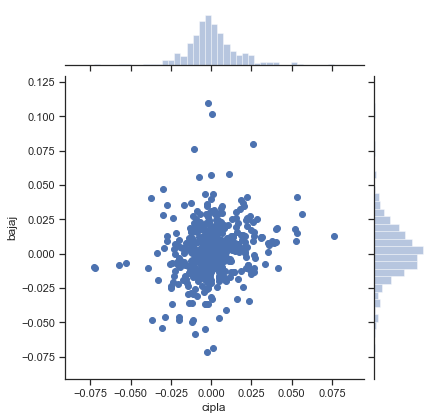

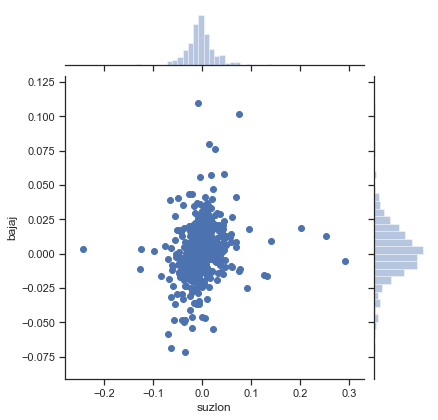

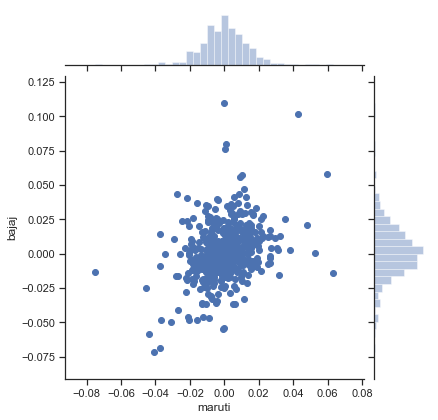

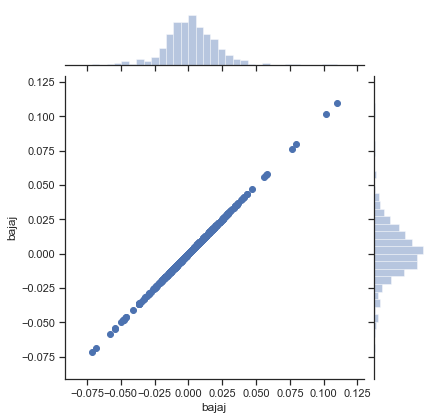

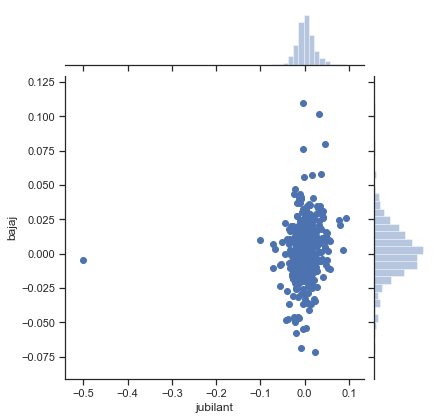

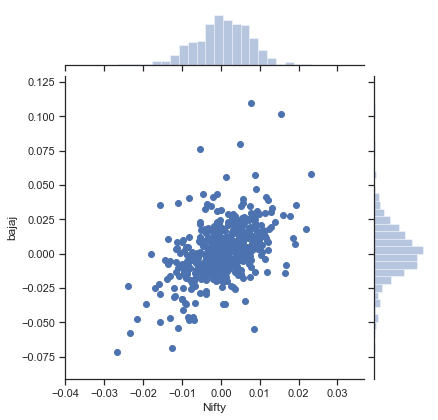

In [20]:
#rets_df = compare.pct_change()
for i in compare.columns:
    sns.jointplot(i, 'bajaj', compare, kind = 'scatter')

# Query 2.7 
Volatility is the change in variance in the returns of a stock over a specific period of time. Do give the following documentation on volatility a read(https://www.investopedia.com/terms/v/volatility.asp).
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

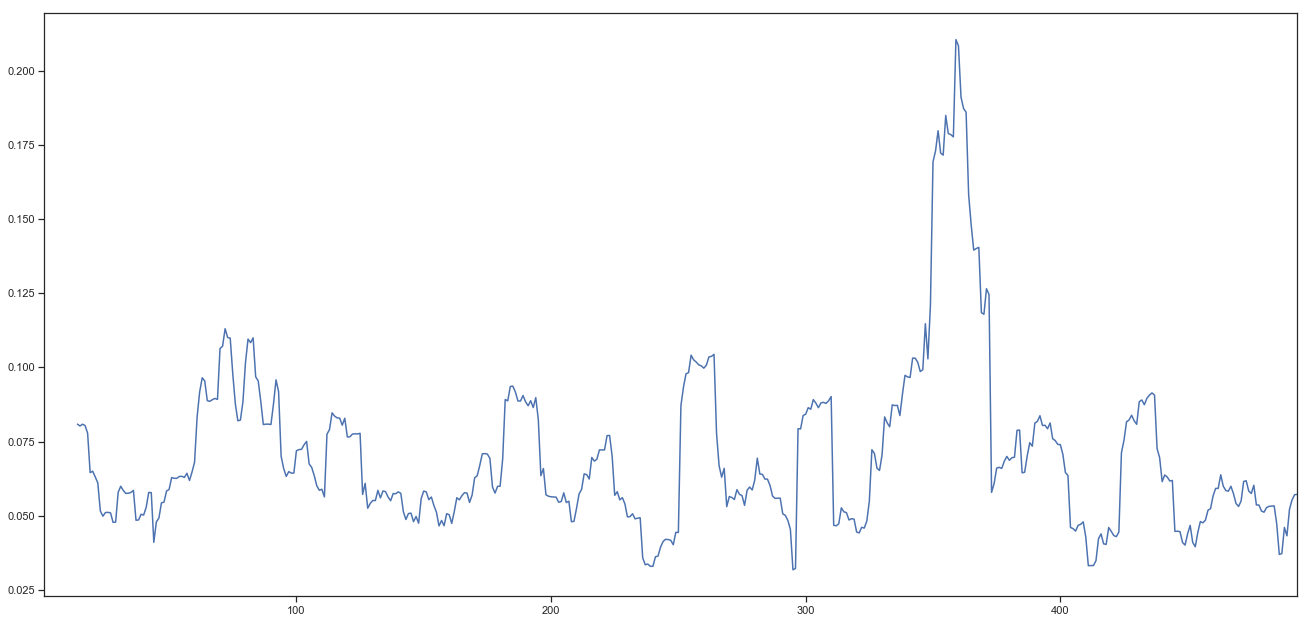

In [21]:
baj = compare['bajaj'].rolling(14).std() * np.sqrt(14)
baj.plot(figsize = (20, 10))
plt.show()

# Query 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

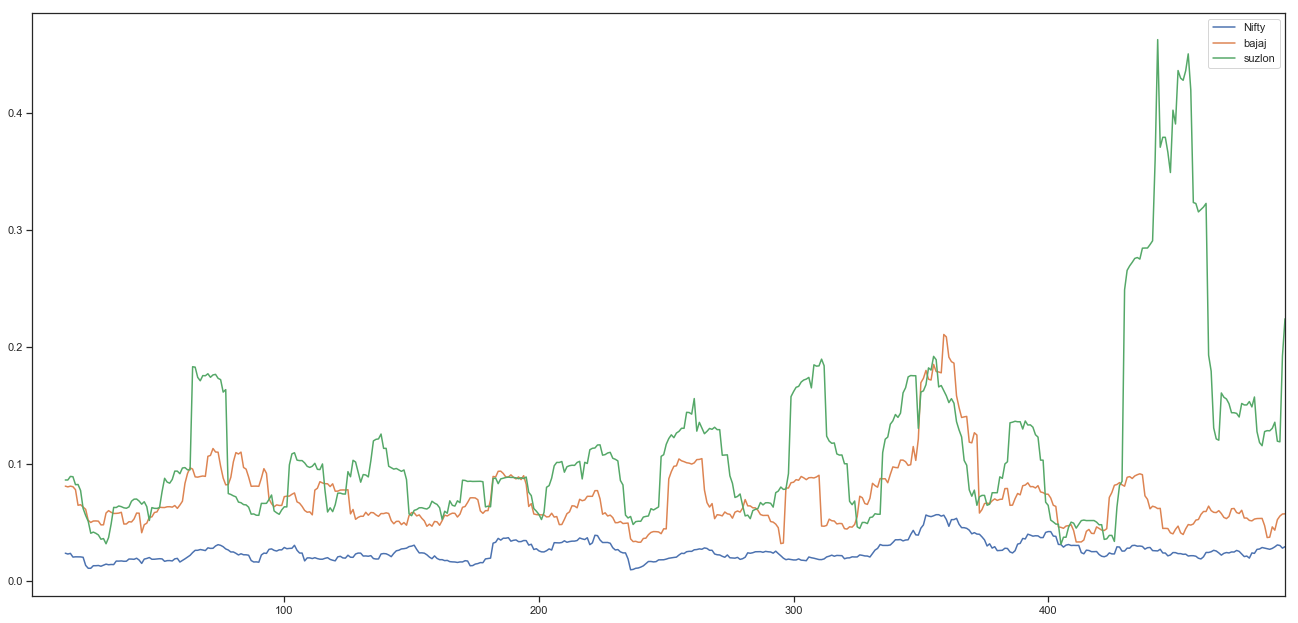

In [22]:
compare = compare[['Nifty', 'bajaj', 'suzlon']]
vol = compare.rolling(14).std() * np.sqrt(14)

#plot the volatility
vol.plot(figsize = (20, 10))

#show the plot
plt.show()

# Query 2.9
Trade Calls - Using Simple Moving Averages. Study about moving averages here(https://www.investopedia.com/terms/s/sma.asp). 
Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

In [23]:
signals = pd.DataFrame(index = data.index)
signals['signal'] = 0.0

#create 21 day simple moving average
signals['21_SMA'] = data['Close Price'].rolling(window = 21, min_periods = 1).mean()

#create long simple movig average
signals['34_SMA'] = data['Close Price'].rolling(window = 34, min_periods = 1).mean()

#create signals
signals['signal'][21:] = np.where(signals['21_SMA'][21:] > signals['34_SMA'][21:], 1.0, 0.0)

#generate trading orders
signals['positions'] = signals['signal'].diff()

#print 'signals'
signals

,signal,21_SMA,34_SMA,positions
Date,,,,
2017-05-15,0.0,162.650000,162.650000,NaN
2017-05-16,0.0,160.625000,160.625000,0.0
2017-05-17,0.0,159.833333,159.833333,0.0
2017-05-18,0.0,159.225000,159.225000,0.0
2017-05-19,0.0,157.760000,157.760000,0.0
2017-05-22,0.0,156.541667,156.541667,0.0
2017-05-23,0.0,155.042857,155.042857,0.0
2017-05-24,0.0,153.912500,153.912500,0.0
2017-05-25,0.0,153.438889,153.438889,0.0


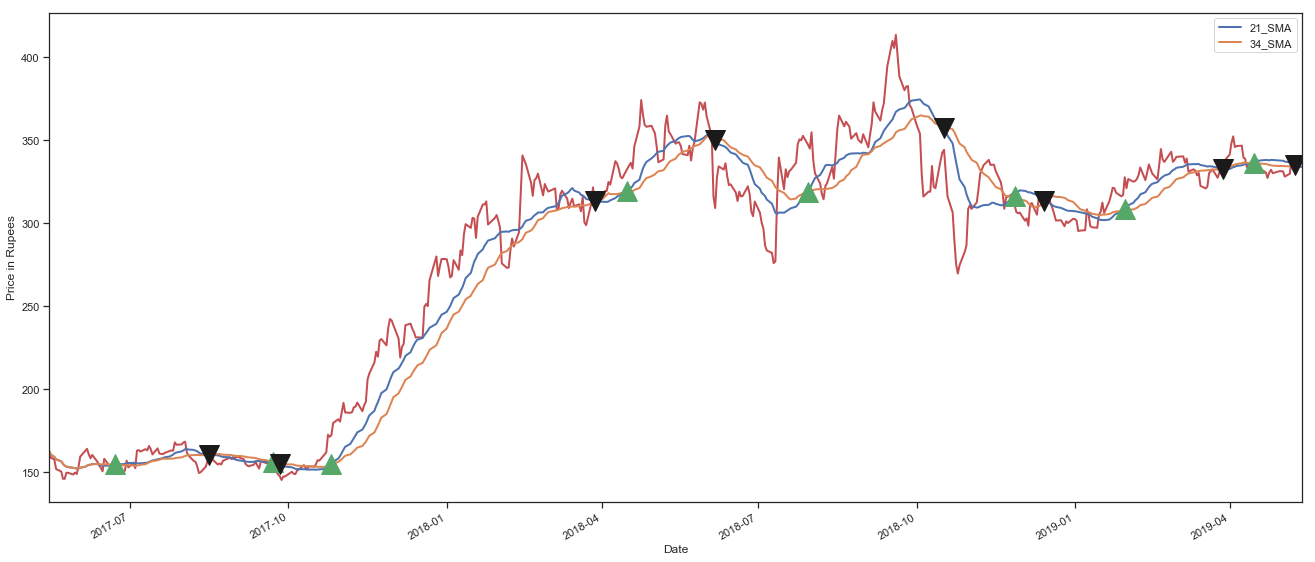

In [24]:
fig = plt.figure(figsize = (20, 10))

#add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel = 'Price in Rupees')

#plot the closing price
data['Close Price'].plot(ax = ax1, color = 'r', lw = 2.)

#plot the short and long moving average
signals[['21_SMA', '34_SMA']].plot(ax = ax1, lw = 2.)

#plot the buy sugnals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals['21_SMA'][signals.positions == 1.0], 
        '^', markersize = 20, color = 'g')

#plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals['21_SMA'][signals.positions == -1.0], 
        'v', markersize = 20, color = 'k')

plt.show()

# Query 2.10
Trade Calls - Using Bollinger Bands(https://www.investopedia.com/terms/b/bollingerbands.asp) 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
- The 14 day rolling mean of the closing price (we call it the average) 
- Upper band which is the rolling mean + 2 standard deviations away from the average. 
- Lower band which is the rolling mean - 2 standard deviations away from the average. 
- Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 


In [25]:
def bbands(price, length = 14, numsd = 2):
    ave = price.rolling(length).mean()
    sd = price.rolling(length).std()
    upband = ave + (sd*2)
    dnband = ave - (sd*numsd)
    return np.round(ave, 3), np.round(upband, 3), np.round(dnband, 3)

data['ave'], data['upper'], data['lower'] = bbands(data['Close Price'])

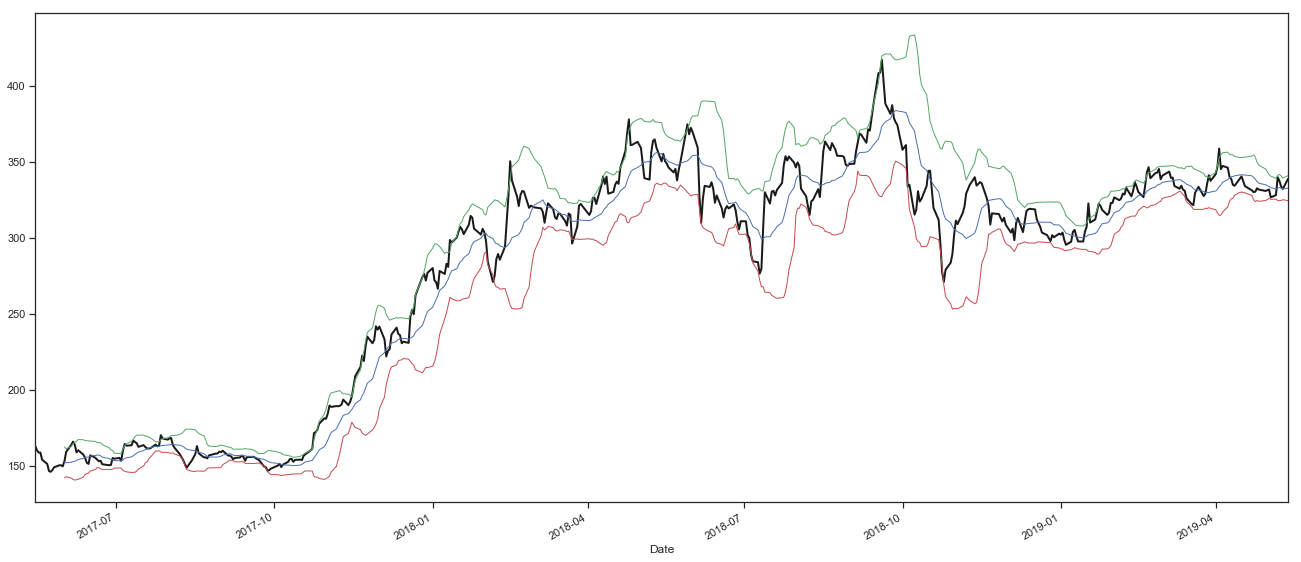

In [26]:
data['Average Price'].plot(c='k', figsize=(20,10), lw=2)
data['ave'].plot(c='b', figsize=(20,10), lw=1)
data['upper'].plot(c='g', figsize=(20,10), lw=1)
data['lower'].plot(c='r', figsize=(20,10), lw=1)

In [27]:
data.drop('Date', axis=1, inplace=True)
data.to_csv('week3.csv')